In [9]:
'''
imports
'''

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sympy as sym

Viz of the data-

![](images/yourscanfromsnelllibrary/image0004.jpg)


In [3]:
'''
Position the sensor. k1-k4 represent the 4 sensors
'''

k1=(1/np.sqrt(2),1/np.sqrt(2))
k2=(-1/np.sqrt(2),1/np.sqrt(2))
k3=(-1/np.sqrt(2),-1/np.sqrt(2))
k4=(1/np.sqrt(2),-1/np.sqrt(2))

'''
True location of the object
'''

xy_true=(0.2,0.3)

sensors=[k1,k2,k3,k4] # make a list of sensors


# set the sigma_x, sigma_y, sigma_i
sigma_x=0.1
sigma_y=0.1
sigma_i=.01 #0.3 for submission 

In [4]:
def dist_points(p1,p2):
    '''
    L2 distance between points p1 and p2
    Assumes p1 and p2 are both tuples (x,y)
    '''
    return ((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)**(0.5)

In [5]:
def measure_value(k):
    '''
    measure the distance between sensor k and true position "xy_true". Add gaussian noise with std sigma_i to it
    '''
    measurement=dist_points(k,xy_true)+np.random.normal(scale=sigma_i)
    if measurement>0:
        return measurement
    else:
        measure_value(k)

In [6]:
'''
Calculate the distance of sensor to true position "xy_true", by calling the function measure_value
Store the resulting values in a dictionary
'''


sensor_measurements=dict()
sensor_measurements[k1]=measure_value(k1)
sensor_measurements[k2]=measure_value(k2)
sensor_measurements[k3]=measure_value(k3)
sensor_measurements[k4]=measure_value(k4)
print ("sensor data is :\n", sensor_measurements)
print ('\n\n')
for j,i in enumerate(sensor_measurements):
    print ("Distance of sensor k"+str(j+1)+" from true positon",sensor_measurements[i])

sensor data is :
 {(0.7071067811865475, 0.7071067811865475): 0.6451761942076968, (-0.7071067811865475, 0.7071067811865475): 1.0024351553984014, (-0.7071067811865475, -0.7071067811865475): 1.3675174669665544, (0.7071067811865475, -0.7071067811865475): 1.1276801471635933}



Distance of sensor k1 from true positon 0.6451761942076968
Distance of sensor k2 from true positon 1.0024351553984014
Distance of sensor k3 from true positon 1.3675174669665544
Distance of sensor k4 from true positon 1.1276801471635933


![](images/1.png)

In [7]:
# Pre define the contour_level. This sets the contour levels for all the plots. 
contour_level=[]
for i in range(0,300,10):
    contour_level.append(i)


# Create a meshgrid of X-Y
x = np.linspace(-2, 2, 1000)
y = np.linspace(-2, 2, 1000)
X, Y = np.meshgrid(x, y)


# Below functions give the MAP objective values for different cases. Refer above image for the formaula. 

def f0(x, y):
    '''
    MAP objective if no sensor were present. 
    '''
    prior=(x**2)/(sigma_x**2)+(y**2)/(sigma_y**2)
    return prior

def f1(x, y):
    '''
    MAP objective if 1 sensor was present. 
    '''
    
    first_senor=(np.square(sensor_measurements[k1]-np.sqrt((k1[0]-x)**2+(k1[1]-y)**2)))*(1/sigma_i**2)
    prior=(x**2)/(sigma_x**2)+(y**2)/(sigma_y**2)
    return first_senor+prior



def f2(x, y):
    '''
    two sensor
    '''
    prior=(x**2)/(sigma_x**2)+(y**2)/(sigma_y**2)
    first_senor=(np.square(sensor_measurements[k1]-np.sqrt((k1[0]-x)**2+(k1[1]-y)**2)))*(1/sigma_i**2)
    second_senor=(np.square(sensor_measurements[k3]-np.sqrt((k3[0]-x)**2+(k3[1]-y)**2)))*(1/sigma_i**2)
    return first_senor+second_senor+prior

def f3(x, y):
    '''
    three sensor
    '''
    prior=(x**2)/(sigma_x**2)+(y**2)/(sigma_y**2)
    first_senor=(np.square(sensor_measurements[k1]-np.sqrt((k1[0]-x)**2+(k1[1]-y)**2)))*(1/sigma_i**2)
    second_senor=(np.square(sensor_measurements[k2]-np.sqrt((k2[0]-x)**2+(k2[1]-y)**2)))*(1/sigma_i**2)
    third_senor=(np.square(sensor_measurements[k3]-np.sqrt((k3[0]-x)**2+(k3[1]-y)**2)))*(1/sigma_i**2)
    return first_senor+second_senor+third_senor+prior

def f4(x, y):
    '''
    four sensor
    '''
    prior=(x**2)/(sigma_x**2)+(y**2)/(sigma_y**2)
    first_senor=(np.square(sensor_measurements[k1]-np.sqrt((k1[0]-x)**2+(k1[1]-y)**2)))*(1/sigma_i**2)
    second_senor=(np.square(sensor_measurements[k2]-np.sqrt((k2[0]-x)**2+(k2[1]-y)**2)))*(1/sigma_i**2)
    third_senor=(np.square(sensor_measurements[k3]-np.sqrt((k3[0]-x)**2+(k3[1]-y)**2)))*(1/sigma_i**2)
    forth_senor=(np.square(sensor_measurements[k4]-np.sqrt((k4[0]-x)**2+(k4[1]-y)**2)))*(1/sigma_i**2)
    return first_senor+second_senor+third_senor+forth_senor+prior



'''

Plotting function. 

Takes in argument objective function and number of sensors
Objective function can be one of functions defined above- f0,f1,f2,f3,f4
num_sensors can be 0-4
'''


def _plot_(f,num_sensors):
    Z = f(X, Y)   # compute Z for objective function f
    from matplotlib.pyplot import figure
    fig=figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
    
    # plot contour
    plt.contourf(X, Y, Z, 20, cmap='RdGy',levels=contour_level);  
    
    # set true labels and sensor positions
    plt.plot([xy_true[0]], [xy_true[1]], marker='+', markersize=20, color="blue",label="True xy",mew=2)
    if num_sensors==1:
        plt.plot([k1[0]], [k1[1]], marker='o', markersize=10, color="black",label="Sensor 1")
    elif num_sensors==2:
        plt.plot([k1[0]], [k1[1]], marker='o', markersize=10, color="black",label="Sensor 1")
        plt.plot([k3[0]], [k3[1]], marker='o', markersize=10, color="black",label="Sensor 2")
    elif num_sensors==3:
        plt.plot([k1[0]], [k1[1]], marker='o', markersize=10, color="black",label="Sensor 1")
        plt.plot([k2[0]], [k2[1]], marker='o', markersize=10, color="black",label="Sensor 2")
        plt.plot([k3[0]], [k3[1]], marker='o', markersize=10, color="black",label="Sensor 3")
    elif num_sensors==4:
        plt.plot([k1[0]], [k1[1]], marker='o', markersize=10, color="black",label="Sensor 1")
        plt.plot([k2[0]], [k2[1]], marker='o', markersize=10, color="black",label="Sensor 2")
        plt.plot([k3[0]], [k3[1]], marker='o', markersize=10, color="black",label="Sensor 3")
        plt.plot([k4[0]], [k4[1]], marker='o', markersize=10, color="black",label="Sensor 4")
            
        
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    plt.colorbar();
    plt.legend();
    return fig

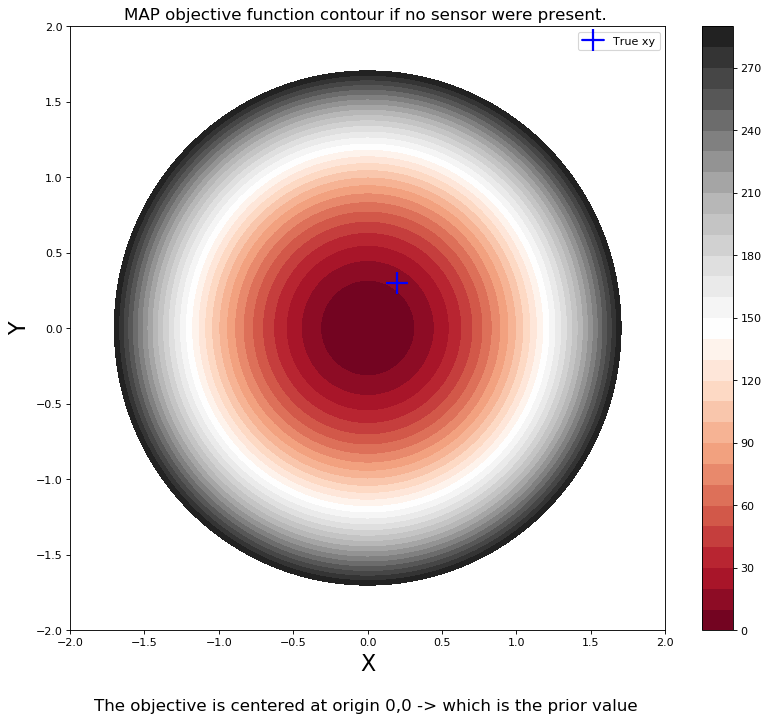

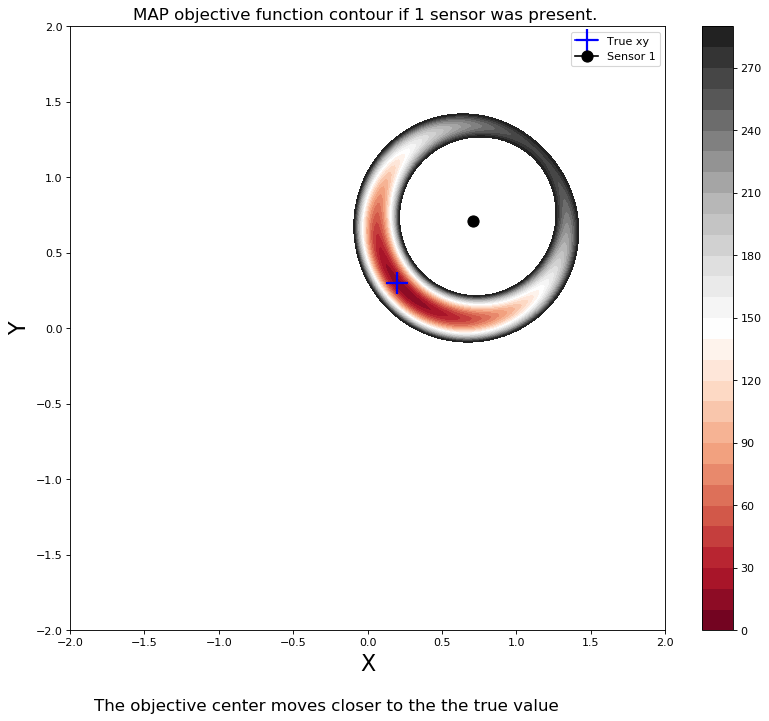

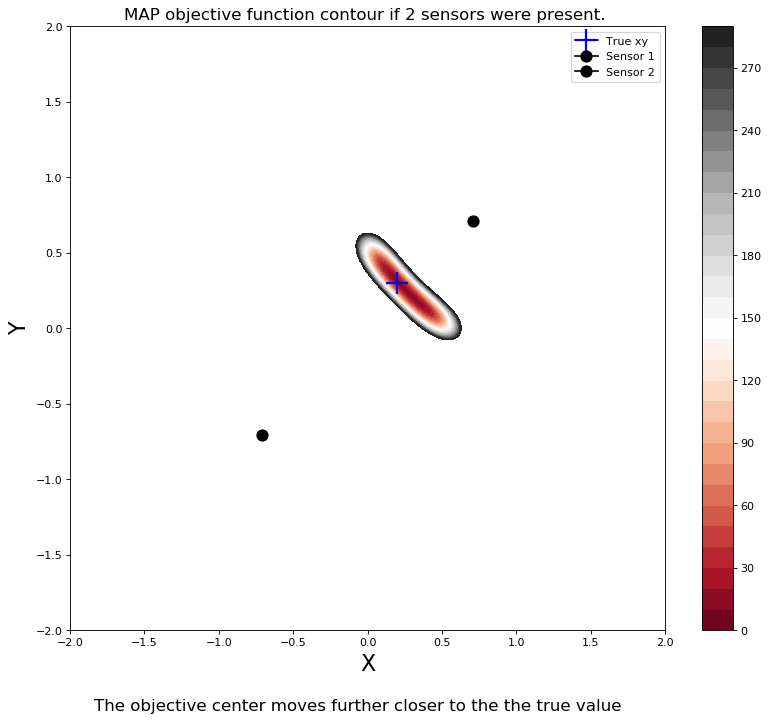

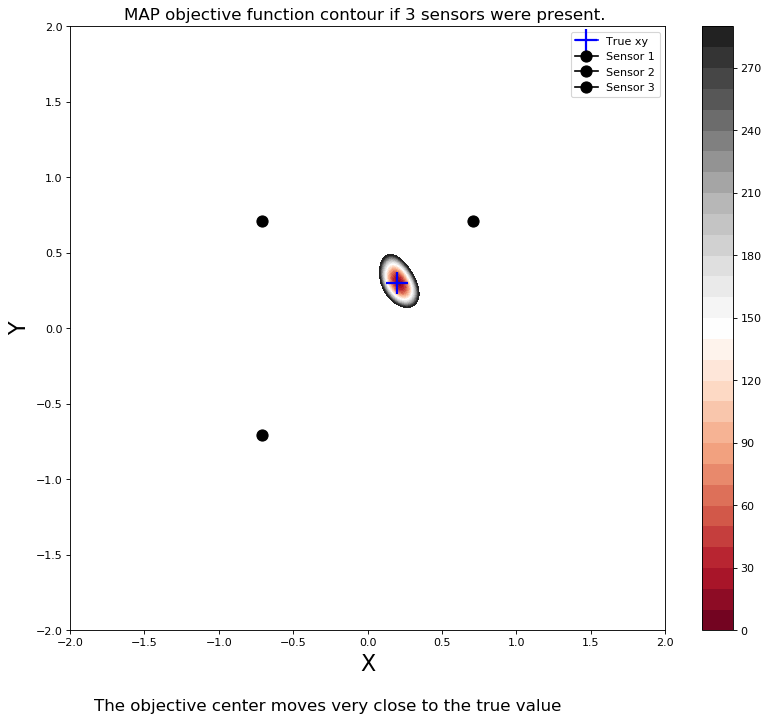

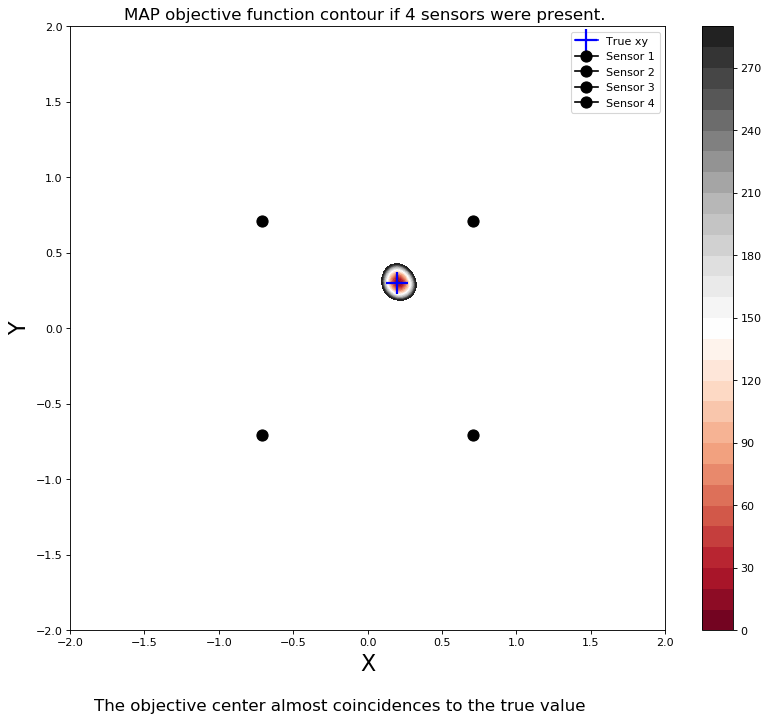

In [8]:
fig=_plot_(f0,0)
# MAP estimate matches with prior value. 
plt.title('MAP objective function contour if no sensor were present. ',fontsize=15)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20);
fig.text(.15,0.025,'The objective is centered at origin 0,0 -> which is the prior value',fontsize=15);

fig=_plot_(f1,1)
plt.title('MAP objective function contour if 1 sensor was present. ',fontsize=15)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20);
fig.text(.15,0.025,'The objective center moves closer to the the true value',fontsize=15);

fig=_plot_(f2,2)
plt.title('MAP objective function contour if 2 sensors were present. ',fontsize=15)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20);
fig.text(.15,0.025,'The objective center moves further closer to the the true value',fontsize=15);

fig=_plot_(f3,3)
plt.title('MAP objective function contour if 3 sensors were present. ',fontsize=15)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20);
fig.text(.15,0.025,'The objective center moves very close to the true value',fontsize=15);

fig=_plot_(f4,4)
plt.title('MAP objective function contour if 4 sensors were present. ',fontsize=15)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20);
fig.text(.15,0.025,'The objective center almost coincidences to the true value',fontsize=15);